In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn import metrics
import scanpy as sc
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns

In [16]:
#Import a dataset
global_dir_path = "C://Users/chris/OneDrive/Desktop/MIT postdoc project/ABN project/Lung cancer/Headspace_data"

#6wks and 7wks - May/June
# dir_path = global_dir_path + '/2023_May_June_Eml4-Alk_analysis' 
# dir_list = sorted(os.listdir(dir_path))

#5wks - August
# dir_path2 = global_dir_path + '/2023_0816_0817_Breath_Eml4Alk_5wks_multiplex/All samples_spectra/AUC/Clean_mass'
dir_path2 = global_dir_path + '/2023_0816_0817_Breath_Eml4Alk_5wks_multiplex/All samples_spectra/AUC/Clean_mass_r2'

dir_list2 = sorted(os.listdir(dir_path2))
print(dir_list2)

#4wks - August
# dir_path3 = global_dir_path + '/2023_0809_0810_Breath_Eml4Alk_4wks_multiplex/Spectra/AUC/Clean_mass'
# dir_path3 = global_dir_path + '/2023_0809_0810_Breath_Eml4Alk_4wks_multiplex/Spectra/AUC/Clean_mass_round'

# dir_list3 = sorted(os.listdir(dir_path3))
# print(dir_list3)

#6wks August
# dir_path0 = global_dir_path + '/2023_08_24_Breath_EmlAlk_6wks_multiplex/Spectra/AUC/Clean_mass'
# dir_list0 = sorted(os.listdir(dir_path0))
# print(dir_list0)

#4wks - October
# dir_path4 = global_dir_path + '/2023_10_19_Breath_Eml4Alk_4wk_5plex/Spectra/AUC/Clean_mass' 
# dir_list4 = sorted(os.listdir(dir_path4))
# print(dir_list4)

#5wks - October
# dir_path5 = global_dir_path + '/2023_10_26_Breath_Eml4Alk_5wks_cohort2/spectra/AUC/Clean_mass' 
# dir_list5 = sorted(os.listdir(dir_path5))
# print(dir_list5)

#6wks - October
# dir_path6 = global_dir_path + '/2023_10_23_Breath_Eml4-Alk_6wks_cohort1/spectra/AUC/Clean_mass' 
# dir_list6 = sorted(os.listdir(dir_path6))

# print(dir_list6)

['2023_08_16_Breath_Eml4Alk_cage2_3_part_001_AUC.xlsx', '2023_08_16_Breath_Eml4Alk_cage7_5_part_001_AUC.xlsx', '2023_08_16_Breath_H2_Healthy_cage8_8_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage1_2_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage1_3_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage1_4_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage1_5_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage2_1_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage3_1_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage3_2_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage4_2_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage4_3_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage5_4_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage6_3_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage6_5_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage7_1_part_001_AUC.xlsx', '2023_08_17_Breath_Eml4Alk_cage7_3_part_001_AUC.xlsx', '2023_08_17_Breath_Healthy1_cage10_1_part_001_AUC.xlsx', '202

In [17]:
#import excel file using panda as df
# name = dir_path + '/zscore_10_30min_AUC_code_6wks.xlsx'
name = dir_path2 + '/Combined_zscore.xlsx'
#combined zscore is a file that combines the two independent experiments; only masses that
#appear in both experiments are included. The combined zscore is generated using codes in step 5
#remove that file if re-running steps1-3

# name = dir_path3 + '/Combined_zscore.xlsx'
# name = dir_path0 + '/Combined_zscore.xlsx'
# name = dir_path4 + '/zscore.xlsx'
# name = dir_path5 + '/zscore.xlsx'
# name = dir_path6 + '/zscore.xlsx'
df = pd.read_excel(name)

df

,Unnamed: 0.1,Unnamed: 0,Sample_type,15,17,20,21,27,29,29.1,...,223.1,223.2,225,225.1,280.9,281,281.1,281.2,297,297.1
0,0,0,Cancer,0.373498,-0.275435,-0.299104,-0.542931,0.858489,-1.642652,-0.623965,...,-0.145844,-0.545146,-0.306842,0.478642,-0.208514,0.065522,-0.753579,-0.208514,-0.423778,-0.596059
1,1,1,Cancer,1.264246,-0.275435,-0.299104,-0.542931,-1.082953,-1.636669,0.641876,...,0.446125,-0.545146,-0.891118,0.052443,-0.208514,-1.122060,-0.753579,-0.208514,-0.423778,-0.596059
2,2,2,Healthy,0.361898,-0.275435,-0.299104,-0.542931,0.533324,0.112414,1.249185,...,-2.085025,-0.545146,-2.043312,-1.427858,-0.208514,-1.122060,-0.753579,-0.208514,-0.423778,-0.596059
3,3,3,Cancer,-1.449426,-0.275435,-0.299104,-0.542931,-1.005687,-1.655715,-0.623965,...,-0.034877,-0.545146,-0.180993,0.475325,-0.208514,0.989297,1.003194,-0.208514,1.862802,1.791871
4,4,4,Cancer,0.682766,-0.275435,-0.299104,-0.542931,-1.097271,0.154500,2.134122,...,-0.291561,-0.545146,0.282493,-1.427858,-0.208514,-1.122060,-0.753579,-0.208514,-0.423778,-0.596059
5,5,5,Cancer,-0.104118,-0.275435,-0.299104,-0.542931,1.160136,0.772142,-0.623965,...,-0.650120,-0.545146,0.486776,0.244006,-0.208514,0.740648,-0.753579,-0.208514,-0.423778,-0.596059
6,6,6,Cancer,0.271496,-0.275435,-0.299104,-0.542931,-0.750913,0.721358,-0.623965,...,-1.429363,1.565221,0.068372,-1.427858,-0.208514,-1.122060,-0.753579,-0.208514,-0.423778,-0.596059
7,7,7,Cancer,-1.027293,-0.275435,-0.299104,0.632672,-0.555564,0.224841,0.074274,...,-0.593727,0.928673,-0.624500,0.000596,-0.208514,0.478394,0.595849,-0.208514,1.520341,0.764338
8,8,8,Cancer,0.996320,1.620585,-0.299104,-0.542931,-0.532940,-1.620046,-0.623965,...,-1.224825,-0.545146,-0.178248,-1.427858,-0.208514,-1.122060,-0.753579,-0.208514,-0.423778,-0.596059
9,9,9,Cancer,-0.432959,-0.275435,3.727036,-0.542931,0.960334,0.403082,1.379285,...,-0.014631,-0.545146,0.815912,1.479585,-0.208514,1.706164,1.101270,-0.208514,-0.423778,-0.596059


In [18]:
col_num = len(df.columns)
ns_pca = df.iloc[:,3:col_num] 
#In combined zscore, start from the 3rd column
#Individual zscore, start from the 2nd column

# print(ns_pca)
arr_ns = np.array(ns_pca)
# print(arr_ns)

In [19]:
pca_cancer = PCA(n_components = 2)
components_cancer = pca_cancer.fit_transform(ns_pca)

In [20]:
pca_cancer_df = pd.DataFrame(data = components_cancer, columns = ['PCA1', 'PCA2'])

In [21]:
type = df.iloc[:,2]
#for combined zscore, start from 2nd column
#for individual zscore, start from 1st column
pca_cancer_df['Label'] = type

In [22]:
def PC_results(pca_cancer):
    result = pca_cancer.explained_variance_ratio_
    PC1_result = round(result[0], 2)*100
    PC2_result = round(result[1], 2)*100
    
    return PC1_result, PC2_result

In [23]:
def confidence_ellipse(x, y, ax, n_std, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x,y)
    pearson = cov[0,1]/np.sqrt(cov[0,0] * cov[1,1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)
    
    scale_x = np.sqrt(cov[0,0]) * float(n_std)
    mean_x = np.mean(x)
    
    scale_y = np.sqrt(cov[1,1]) * float(n_std)
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [24]:
#x and y axes values for drawing the ellipse
def ell_values(pca_cancer_df):
    ell_E_x = []
    ell_E_y = []
    ell_H_x = []
    ell_H_y = []

    for i in range(0, len(pca_cancer_df)-1):
        if pca_cancer_df['Label'].iloc[i] == 'Healthy':
            ell_H_x.append(pca_cancer_df['PCA1'].iloc[i])
            ell_H_y.append(pca_cancer_df['PCA2'].iloc[i])
        elif pca_cancer_df['Label'].iloc[i] == 'Cancer':
            ell_E_x.append(pca_cancer_df['PCA1'].iloc[i])
            ell_E_y.append(pca_cancer_df['PCA2'].iloc[i])

    ell_E_x = np.array(ell_E_x)
    ell_E_y = np.array(ell_E_y)
    ell_H_x = np.array(ell_H_x)
    ell_H_y = np.array(ell_H_y)
    
    return ell_E_x, ell_E_y, ell_H_x, ell_H_y

In [25]:
def plot_figure(pca_cancer_df):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.rc('font', family='Arial')
    #plot the ellipse:       
    confidence_ellipse(ell_values(pca_cancer_df)[0], ell_values(pca_cancer_df)[1], ax, n_std=1.5, edgecolor = 'red')
    confidence_ellipse(ell_values(pca_cancer_df)[2], ell_values(pca_cancer_df)[3], ax, n_std=1.5, edgecolor = 'blue')

    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.xlabel('PC1 ({}% explained var.)'.format(round(PC_results(pca_cancer)[0],2)), fontsize=17, fontname="Arial")
    plt.ylabel('PC2 ({}% explained var.)'.format(round(PC_results(pca_cancer)[1],2)), fontsize=17, fontname="Arial")

    targets = ['Cancer', 'Healthy']
    colors = ['r', 'b']

    for target, color in zip(targets,colors):
        indices = pca_cancer_df['Label'] == target
        plt.scatter(pca_cancer_df.loc[indices, 'PCA1'], pca_cancer_df.loc[indices, 'PCA2'], c = color, s = 30)

    plt.legend(targets, prop={'size':14}, edgecolor="None", loc="best")

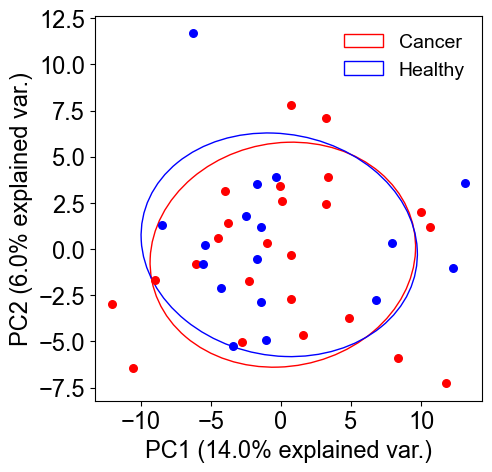

In [26]:
plot_figure(pca_cancer_df)

In [142]:
#7 weeks data - 3 groups

#Import a dataset
#6wks and 7wks - May/June
# dir_path7 = global_dir_path + '/2023_May_June_Eml4-Alk_analysis' 
# dir_list7 = sorted(os.listdir(dir_path7))

#7wks - October
dir_path8 = global_dir_path + '/2023_10_30_Breath_Eml4Alk_7wks_cohort1'
dir_list8 = sorted(os.listdir(dir_path8))

print(dir_list8)

['2023_10_30_Breath_Eml4Alk_7wks_cancer1_1_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer1_3_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer1_4_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer1_5_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer2_1_low dose_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer2_2_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer2_3_bad10minpk4_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer2_4_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_cancer2_5_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_treated_3_1_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_treated_3_2_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_treated_3_3_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_treated_3_4_bad60minpk4_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_treated_3_5_part_001_export.txt', '2023_10_30_Breath_Eml4Alk_7wks_treated_4_1_part_001_export.txt', '2023_10_30_Breath_Em

In [162]:
# name = dir_path7 + '/zscore_10_30min_AUC_code_7wks.xlsx'
name = dir_path8 + '/zscore_10_30min_AUC_7wks.xlsx'
df2 = pd.read_excel(name)
print(df2)

     ID  PP01-HFA1  PP10-d7isop  PP12-d5eth  PP13-HFA3
0    H1  -1.242749    -1.363119   -0.652533  -1.180085
1    H2  -1.446667    -1.437322    1.286956  -0.104448
2    H3  -0.719211    -0.599604    0.168451  -0.525154
3    H4   0.540846     0.536448   -1.105281   3.607327
4    H5   0.446591     0.728248    0.642759   0.875874
5    H6   1.438384     0.969735   -0.183399   0.133749
6    E1   0.033017     0.151978   -0.639597  -0.541745
7    E2  -1.156047    -1.113387   -0.945741  -1.304081
8    E3  -0.225580    -0.220341    0.090837  -0.423397
9    E4   1.253499     1.385015    3.052244   0.696542
10   E5   1.022393     0.731720   -0.098886   0.323053
11   E6   0.912127     0.762530    0.595328   0.918677
12   E7   0.990975     0.690279    1.042903   0.178846
13   E8  -0.557286    -0.419519   -0.852605  -0.531331
14   T1  -1.166620    -1.422134   -0.566295  -0.603523
15   T2  -1.427634    -1.671432   -1.610635  -1.144518
16   T3  -0.366963    -0.516071   -0.811210  -0.610848
17   T4  -

In [163]:
ns_pca = df2.iloc[:,1:5]
print(ns_pca)
pca_cancer = PCA(n_components = 2)
components_cancer = pca_cancer.fit_transform(ns_pca)

pca_cancer_df = pd.DataFrame(data = components_cancer, columns = ['PCA1', 'PCA2'])

    PP01-HFA1  PP10-d7isop  PP12-d5eth  PP13-HFA3
0   -1.242749    -1.363119   -0.652533  -1.180085
1   -1.446667    -1.437322    1.286956  -0.104448
2   -0.719211    -0.599604    0.168451  -0.525154
3    0.540846     0.536448   -1.105281   3.607327
4    0.446591     0.728248    0.642759   0.875874
5    1.438384     0.969735   -0.183399   0.133749
6    0.033017     0.151978   -0.639597  -0.541745
7   -1.156047    -1.113387   -0.945741  -1.304081
8   -0.225580    -0.220341    0.090837  -0.423397
9    1.253499     1.385015    3.052244   0.696542
10   1.022393     0.731720   -0.098886   0.323053
11   0.912127     0.762530    0.595328   0.918677
12   0.990975     0.690279    1.042903   0.178846
13  -0.557286    -0.419519   -0.852605  -0.531331
14  -1.166620    -1.422134   -0.566295  -0.603523
15  -1.427634    -1.671432   -1.610635  -1.144518
16  -0.366963    -0.516071   -0.811210  -0.610848
17  -0.353670    -0.167184    0.816097  -0.091740
18  -0.139784    -0.204503   -0.660294   0.480850


In [164]:
type2 = df2.iloc[:,0]
assign_type2 = []
for i in type2:
    if 'H' in i:
        assign_type2.append('Healthy')
    elif 'C' in i or 'E' in i:
        assign_type2.append('Cancer')
    elif 'T' in i:
        assign_type2.append('Treated')

pca_cancer_df['Label'] = assign_type2
print(pca_cancer_df)

        PCA1      PCA2    Label
0  -2.273924 -0.200724  Healthy
1  -1.252334 -1.385170  Healthy
2  -0.939585 -0.504707  Healthy
3   1.873693  2.789534  Healthy
4   1.307176 -0.052233  Healthy
5   1.382257  0.421875  Healthy
6  -0.367755  0.301682   Cancer
7  -2.240208  0.013447   Cancer
8  -0.417960 -0.318107   Cancer
9   2.926583 -2.111401   Cancer
10  1.122392  0.385010   Cancer
11  1.596158  0.061647   Cancer
12  1.421076 -0.679664   Cancer
13 -1.108673  0.402550   Cancer
14 -1.970841  0.009914  Treated
15 -2.883751  0.613461  Treated
16 -1.077388  0.344590  Treated
17 -0.050810 -0.797382  Treated
18 -0.214483  0.781463  Treated
19  0.039490  0.076923  Treated
20 -1.830208  0.111574  Treated
21  3.021217  0.965038  Treated
22 -0.145442 -0.356968  Treated
23  2.083319 -0.872354  Treated


In [165]:
def ell_values2(pca_cancer_df):
    ell_E_x = []
    ell_E_y = []
    ell_H_x = []
    ell_H_y = []
    ell_T_x = []
    ell_T_y = []

    for i in range(0, len(pca_cancer_df)-1):
        if pca_cancer_df['Label'].iloc[i] == 'Healthy':
            ell_H_x.append(pca_cancer_df['PCA1'].iloc[i])
            ell_H_y.append(pca_cancer_df['PCA2'].iloc[i])
        elif pca_cancer_df['Label'].iloc[i] == 'Cancer':
            ell_E_x.append(pca_cancer_df['PCA1'].iloc[i])
            ell_E_y.append(pca_cancer_df['PCA2'].iloc[i])
        elif pca_cancer_df['Label'].iloc[i] == 'Treated':
            ell_T_x.append(pca_cancer_df['PCA1'].iloc[i])
            ell_T_y.append(pca_cancer_df['PCA2'].iloc[i])

    ell_E_x = np.array(ell_E_x)
    ell_E_y = np.array(ell_E_y)
    ell_H_x = np.array(ell_H_x)
    ell_H_y = np.array(ell_H_y)
    ell_T_x = np.array(ell_T_x)
    ell_T_y = np.array(ell_T_y)
    
    return ell_E_x, ell_E_y, ell_H_x, ell_H_y, ell_T_x, ell_T_y

In [166]:
def plot_figure2(pca_cancer_df):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    plt.rc('font', family='Arial')
    #plot the ellipse:       
    confidence_ellipse(ell_values2(pca_cancer_df)[0], ell_values2(pca_cancer_df)[1], ax, n_std=1.5, edgecolor = 'red')
    confidence_ellipse(ell_values2(pca_cancer_df)[2], ell_values2(pca_cancer_df)[3], ax, n_std=1.5, edgecolor = 'blue')
    confidence_ellipse(ell_values2(pca_cancer_df)[4], ell_values2(pca_cancer_df)[5], ax, n_std=1, edgecolor = 'green')

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('PC1 ({}% explained var.)'.format(PC_results(pca_cancer)[0]), fontsize=16)
    plt.ylabel('PC2 ({}% explained var.)'.format(PC_results(pca_cancer)[1]), fontsize=16)

    targets = ['Cancer', 'Healthy', 'Treated']
    colors = ['r', 'b', 'g']

    for target, color in zip(targets,colors):
        indices = pca_cancer_df['Label'] == target
        plt.scatter(pca_cancer_df.loc[indices, 'PCA1'], pca_cancer_df.loc[indices, 'PCA2'], c = color, s = 30)

    plt.legend(targets, prop={'size':14}, edgecolor="None")

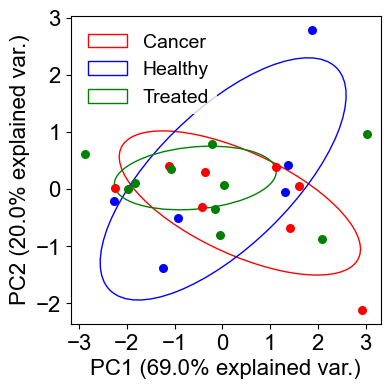

In [167]:
plot_figure2(pca_cancer_df)